# Intro to Folium and geocoding Calgary

Let's showcase how powerful the Folium and Python are!

Notes:
* I have made the folder structure and fake all of the datasets for running through the notebook.
* Please pre-install the following libraries:
  * ipywidgets
  * geocoder
  * geopy
  * folium
  * pandas
  * geopandas
  * branca
  * vega_datasets

In [1]:
# initial look
import folium

m = folium.Map()
m

In [2]:
# Centering the map to Calgary, AB - my dear hometown.
myLocation = [51.049999, -114.066666]

m = folium.Map(
    location=myLocation,
    zoom_start = 10,                 #Smaller the number - more the map will be zoomed out and vice versa
    #tiles="Stamen Terrain",
    #tiles="Stamen Toner",
    #tiles="Stamen Watercolor",
    #tiles="Mapbox Bright",
    #tiles="Mapbox Control Room",
    #tiles="OpenStreetMap",          #default tile - OpenStreetMap
    #tiles="CartoDB Positron",
    #tiles="CartoDB Dark_Matter",
    #tiles="http://{s}.tiles.yourtiles.com/{z}/{x}/{y}.png",     #Custom Tiles

    #min_zoom=20,       
    #max_zoom=90,
    control_scale=True,
    prefer_canvas=True,
    #no_touch=True,
    #disable_3d=True,
    #zoom_control=False,
    #width=500,
    #height=500
    )

m

In [3]:
#Resize the Map

from branca.element import Figure
fig = Figure(width=500, height=500)
fig.add_child(m)

In [4]:
import ipywidgets

#Different Types of Maps - show using ipywidgets

#widget
select_widget = ipywidgets.Select(
    options = ["Open Street Map", "Terrain", "Toner", "Watercolor", "Positron", "Dark Matter"],
    value = "Open Street Map",
    description = "Map Type:",
    disabled = False)

def select(map_type):
  if map_type == "Open Street Map":
    display(folium.Map(location=myLocation, zoom_start=12, height=700))
  if map_type == "Terrain":
    display(folium.Map(location=myLocation, tiles="Stamen Terrain",zoom_start=12, height=700))
  if map_type == "Toner":
    display(folium.Map(location=myLocation, tiles="Stamen Toner",zoom_start=12, height=700))
  if map_type == "Watercolor":
    display(folium.Map(location=myLocation, tiles="Stamen Watercolor",zoom_start=12, height=700))
  if map_type == "Positron":
    display(folium.Map(location=myLocation, tiles="CartoDB Positron",zoom_start=12, height=700))
  if map_type == "Dark Matter":
    display(folium.Map(location=myLocation, tiles="CartoDB Dark_Matter",zoom_start=12, height=700))

ipywidgets.interact(select, map_type=select_widget)

interactive(children=(Select(description='Map Type:', options=('Open Street Map', 'Terrain', 'Toner', 'Waterco…

<function __main__.select(map_type)>

In [5]:
#Show maps using Map Layer Control (the icon at top right corner)

m = folium.Map(location=myLocation, zoom_start=5)
folium.raster_layers.TileLayer('Open Street Map').add_to(m)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(m)
folium.raster_layers.TileLayer('Stamen Toner').add_to(m)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(m)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(m)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(m)

folium.LayerControl().add_to(m)
m

In [6]:
#Creating Minimaps
from folium import plugins

m = folium.Map(location=myLocation, zoom_start=10)
minimap = plugins.MiniMap(toggle_display=True)
m.add_child(minimap)
plugins.ScrollZoomToggler().add_to(m)
plugins.Fullscreen(position="topright").add_to(m)

m

In [7]:
import geocoder

#Markers
m = folium.Map(location=myLocation, zoom_start=14)

address = geocoder.osm("641 17 Ave SW, Calgary")
address_latlng = [address.lat, address.lng]

#address.osm # for debugging only

folium.Marker(address_latlng, 
              popup='<i>Western Canada High School</i>',
              tooltip = "Click Me!"
              ).add_to(m)
m

In [8]:
# Another tile
m = folium.Map(location=myLocation, zoom_start=12, tiles='Stamen Terrain')

tooltip = 'Click me!'

folium.Marker(address_latlng, 
              popup='<i>Western Canada High School</i>', 
              tooltip=tooltip,
              # another icon style
              icon=folium.Icon(icon='cloud', color="red", icon_color="blue")
              ).add_to(m)
#folium.Marker(address_latlng, popup='<b>Western Canada High School</b>', tooltip=tooltip).add_to(m)

m

In [9]:
#font-awesome Custom Icon
#website - https://fontawesome.com/icons?d=gallery

m = folium.Map(
    location=myLocation,
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Click me!'

folium.Marker(myLocation, 
              popup='Calgary', 
              tooltip=tooltip,
              icon=folium.Icon(icon='bolt', color="green", icon_color="white", prefix="fa")
              ).add_to(m)

m

In [10]:
#Using Glyphicon Bootstrap icons
#website - https://getbootstrap.com/docs/3.3/components/

m = folium.Map(location=myLocation, zoom_start=12, tiles='Stamen Terrain')

folium.Marker(location=myLocation,
              popup="I love you, Calgary",
              icon=folium.Icon(icon="glyphicon-plane", prefix="glyphicon")).add_to(m)

m

In [11]:
m = folium.Map(location=myLocation, zoom_start=12, tiles='Stamen Terrain')

#Circle gets bigger, smaller on zoomin, zoomout
folium.Circle(
    radius=400,          #radius in meters
    location=myLocation,
    popup='City Center',
    color='crimson',
    zoom_start=40,
    fill=False
).add_to(m)

m

In [12]:
m = folium.Map(location=myLocation, zoom_start=12, tiles='CartoDB Dark_Matter')

#Circle Stays the same size
folium.CircleMarker(
    location=myLocation,
    radius=50,              #radius in pixels
    popup='City Center',
    color='blue',
    fill=True,
    fill_color='blue',
    fill_opacity = 0.3
).add_to(m)

m

In [13]:
# Enble Lat Long Popovers - find location interactively browsing the map
m = folium.Map(location=myLocation, zoom_start=13)

m.add_child(folium.LatLngPopup())

m

In [14]:
#On the Fly Placement of Markers
m = folium.Map(location=myLocation, tiles='Stamen Terrain', zoom_start=13)

folium.Marker(myLocation, popup='City Center').add_to(m)

m.add_child(folium.ClickForMarker(popup='Waypoint'))

m

In [15]:
#Creating Route

m_route = folium.Map(location=[51.0460, -114.0660], zoom_start=17)

points_lat = [51.04670589675149, 51.04577662783794, 51.04569117688689, 
              51.04519983085956, 51.04507165277781, 51.04463370833304,
              51.04455893690459, 51.04545618595895, 51.04560572577824, 
              51.0465670416616, 51.04670589675149]
points_lng = [-114.07036411875289, -114.07041508759863, -114.06796858299727, 
              -114.0680195518433, -114.06309256340998, -114.06314353225603, 
              -114.06062906919348, -114.06056111073231, -114.06548809916562,
              -114.06543713031958, -114.07036411875289]
points = []
for i in range(len(points_lat)):
    points.append([points_lat[i], points_lng[i]])

# Make marker for each point
for i, lat in enumerate(points):
    folium.Marker([points_lat[i], points_lng[i]],
                  popup=('Calgary Downtown Core'),
                  icon = folium.Icon(color='green',icon='plus')).add_to(m_route)

#Add route to map
folium.PolyLine(points).add_to(m_route)

m_route

In [16]:
#Creating Route using antpath - Animated path

mp_ant_route = folium.Map(location=[51.0460, -114.0660], zoom_start=17, tiles = "CartoDB Dark_Matter")

points_lat = [51.04670589675149, 51.04577662783794, 51.04569117688689, 
              51.04519983085956, 51.04507165277781, 51.04463370833304,
              51.04455893690459, 51.04545618595895, 51.04560572577824, 
              51.0465670416616, 51.04670589675149]
points_lng = [-114.07036411875289, -114.07041508759863, -114.06796858299727, 
              -114.0680195518433, -114.06309256340998, -114.06314353225603, 
              -114.06062906919348, -114.06056111073231, -114.06548809916562,
              -114.06543713031958, -114.07036411875289]
points = []
for i in range(len(points_lat)):
    points.append([points_lat[i], points_lng[i]])

plugins.AntPath(points).add_to(mp_ant_route)

mp_ant_route

In [17]:
# Airports dataframe using vega_datasets
from vega_datasets import data as vds
airports = vds.airports()
airports = airports[:25]
airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [18]:
# Locating Airports in United States
map_airports = folium.Map(location=[38,-98],zoom_start=4)

#Plot airport locations - method 1 - using loop
for (index,row) in airports.iterrows():
  folium.Marker(location = [row.loc['latitude'], row.loc['longitude']], 
                popup=row.loc['name']+' '+row.loc['city']+' '+row.loc['state'], 
                tooltip="Click Me!",
                icon=folium.Icon(icon="glyphicon-plane", prefix="glyphicon")
              ).add_to(map_airports)

#Plot airport locations - method 2 - without using loop
#map_airports_2 = folium.Map(location=[38,-98],zoom_start=4)

#airports.apply(lambda row: folium.Marker(location = [row.loc['latitude'], row.loc['longitude']],
                                         #popup=row.loc['name'],
                                         #icon=folium.Icon(icon="glyphicon-plane", prefix="glyphicon")).add_to(map_airports_2), axis=1)

map_airports

In [19]:
# Let's make iut some data
Vancouver = geocoder.osm('Vancouver, BC')
Calgary = geocoder.osm('Calgary, AB')
Toronto = geocoder.osm('Toronto, ON')
Ottawa = geocoder.osm('Ottawa, ON')
Montreal = geocoder.osm('Montreal, QC')

In [20]:
#If the dataset is a dictionary

markers_dict = {"Vancouver":Vancouver.latlng,
                "Calgary":Calgary.latlng,
                "Toronto":Toronto.latlng,
                "Ottawa":Ottawa.latlng,
                "Montreal":Montreal.latlng}

map_cities = folium.Map(location=[47, -99], zoom_start=4)

for i in markers_dict.items():
  folium.Marker(location=i[1], popup=i[0]).add_to(map_cities)
  print(i)

map_cities

('Vancouver', [49.2608724, -123.113952])
('Calgary', [51.0460954, -114.065465])
('Toronto', [43.6534817, -79.3839347])
('Ottawa', [45.4208777, -75.6901106])
('Montreal', [45.5031824, -73.5698065])


In [21]:
#Multiple Custom Markers
import pandas as pd

cm_df = pd.DataFrame({'city' : ['Vancouver', 'Calgary', 'Toronto', 'Ottawa', 'Montreal'],
                      'latitude' : [Vancouver.lat, Calgary.lat, Toronto.lat, Ottawa.lat, Montreal.lat],
                      'longitude' : [Vancouver.lng, Calgary.lng, Toronto.lng, Ottawa.lng, Montreal.lng],
                      'icon' : ['bicycle','car','bus','truck','motorcycle']})
cm_df

,city,latitude,longitude,icon
0,Vancouver,49.260872,-123.113952,bicycle
1,Calgary,51.046095,-114.065465,car
2,Toronto,43.653482,-79.383935,bus
3,Ottawa,45.420878,-75.690111,truck
4,Montreal,45.503182,-73.569806,motorcycle


In [22]:
map_multiple_mark = folium.Map(location=[cm_df['latitude'].mean(),cm_df['longitude'].mean()], zoom_start=4)

for i in cm_df.itertuples():
  folium.Marker(location=[i.latitude, i.longitude],
                popup=i.city,
                icon = folium.Icon(icon=i.icon, prefix='fa')).add_to(map_multiple_mark)

map_multiple_mark

In [23]:
for i in cm_df.itertuples():
  print(i)
  print(i.city)

Pandas(Index=0, city='Vancouver', latitude=49.2608724, longitude=-123.113952, icon='bicycle')
Vancouver
Pandas(Index=1, city='Calgary', latitude=51.0460954, longitude=-114.065465, icon='car')
Calgary
Pandas(Index=2, city='Toronto', latitude=43.6534817, longitude=-79.3839347, icon='bus')
Toronto
Pandas(Index=3, city='Ottawa', latitude=45.4208777, longitude=-75.6901106, icon='truck')
Ottawa
Pandas(Index=4, city='Montreal', latitude=45.5031824, longitude=-73.5698065, icon='motorcycle')
Montreal


In [24]:
cm_df = pd.DataFrame({'city' : ['Vancouver', 'Calgary', 'Toronto', 'Ottawa', 'Montreal'],
                      'latitude' : [Vancouver.lat, Calgary.lat, Toronto.lat, Ottawa.lat, Montreal.lat],
                      'longitude' : [Vancouver.lng, Calgary.lng, Toronto.lng, Ottawa.lng, Montreal.lng],
                      'icon_num' : [1,2,3,4,5]})

map_enum_icons = folium.Map([cm_df['latitude'].mean(),cm_df['longitude'].mean()], zoom_start=4)

for i in cm_df.itertuples():
  folium.Marker(location=[i.latitude, i.longitude],
                popup=i.city,
                icon = plugins.BeautifyIcon(number=i.icon_num,
                                            border_color='blue',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;',
                                            #icon="graphicon-plane",
                                            #border_width=3,
                                            #border_color='#000',
                                            #background_color="#FFF",
                                            #inner_color_style="",
                                            spin=True,
                                            )).add_to(map_enum_icons)

map_enum_icons

In [25]:
#Overlay GeoJSON Layers 
import json
map_geoJson = folium.Map(location=myLocation, zoom_start=10)
folium.GeoJson(json.load(open('data/calgary_communities_05.geojson')), name="geojson Calgary").add_to(map_geoJson)
folium.LayerControl().add_to(map_geoJson)
map_geoJson

In [26]:
# Creating HeatMap

# Data Scource: https://en.wikipedia.org/wiki/List_of_the_largest_municipalities_in_Canada_by_population

# List of the 100 latgest cities/towns in Canada sorted by population
# The thousands parameter is very essential and lets process it here since it's gonna be difficulty to do so
popDF = pd.read_csv('data/canada_cities_and_population_ranking_2021.csv', thousands = ',')  

# Subset the first 10 biggest cities
popDF = popDF[:10]
# Make a column of Address for later use
popDF['Address'] = popDF['Municipality'] + ", " + popDF['Province'] + ", Canada"

popDF


,Rank (2021),Municipality,Province,Municipal status,Population (2021),Population (2016),Growth rate (2016-2021),"Land-area (km2, 2021)",Address
0,1,Toronto,Ontario,City,2794356,2731571,2.30%,631.10,"Toronto, Ontario, Canada"
1,2,Montreal,Quebec,Ville,1762949,1704694,3.40%,364.74,"Montreal, Quebec, Canada"
2,3,Calgary,Alberta,City,1306784,1239220,5.50%,820.62,"Calgary, Alberta, Canada"
3,4,Ottawa,Ontario,City,1017449,934243,8.90%,2788.20,"Ottawa, Ontario, Canada"
4,5,Edmonton,Alberta,City,1010899,933088,8.30%,765.61,"Edmonton, Alberta, Canada"
5,6,Winnipeg,Manitoba,City,749607,705244,6.30%,461.78,"Winnipeg, Manitoba, Canada"
6,7,Mississauga,Ontario,City,717961,721599,-0.50%,292.74,"Mississauga, Ontario, Canada"
7,8,Vancouver,British Columbia,City,662248,631486,4.90%,115.18,"Vancouver, British Columbia, Canada"
8,9,Brampton,Ontario,City,656480,593638,10.60%,265.89,"Brampton, Ontario, Canada"
9,10,Hamilton,Ontario,City,569353,536917,6.00%,1118.31,"Hamilton, Ontario, Canada"


In [27]:
# Geocode out the Lat/Lng pair for each city and place into a column named as Addr-Details
# We have to use the apply function since the ops is on Pandas series.
popDF['Addr-Details'] = popDF['Address'].apply(geocoder.osm)

# Print out the coordinates pairs against the cities
for i in range(len(popDF)):
    print('The Coordinates of', popDF['Municipality'][i], 'is:', popDF['Addr-Details'][i].lat, ',', popDF['Addr-Details'][i].lng)


The Coordinates of Toronto is: 43.6534817 , -79.3839347
The Coordinates of Montreal is: 45.5031824 , -73.5698065
The Coordinates of Calgary is: 51.0460954 , -114.065465
The Coordinates of Ottawa is: 45.4208777 , -75.6901106
The Coordinates of Edmonton is: 53.5462055 , -113.491241
The Coordinates of Winnipeg is: 49.8955367 , -97.1384584
The Coordinates of Mississauga is: 43.5896231 , -79.6443879
The Coordinates of Vancouver is: 49.2608724 , -123.113952
The Coordinates of Brampton is: 43.685832 , -79.7599366
The Coordinates of Hamilton is: 43.2560802 , -79.8728583


In [28]:
# Add columns of Latitude, Longitude using lambda function since the ops is on Pandas Series
popDF['Latitude'] = popDF['Addr-Details']. apply(lambda x: x.lat)
popDF['Longitude'] = popDF['Addr-Details']. apply(lambda x: x.lng)
popDF['popDensePerK'] = popDF['Population (2021)']/1000
# Print out the final dataframe
popDF

,Rank (2021),Municipality,Province,Municipal status,Population (2021),Population (2016),Growth rate (2016-2021),"Land-area (km2, 2021)",Address,Addr-Details,Latitude,Longitude,popDensePerK
0,1,Toronto,Ontario,City,2794356,2731571,2.30%,631.10,"Toronto, Ontario, Canada","[[Old Toronto, Toronto, Golden Horseshoe, Onta...",43.653482,-79.383935,2794.356
1,2,Montreal,Quebec,Ville,1762949,1704694,3.40%,364.74,"Montreal, Quebec, Canada","[[Montréal, Agglomération de Montréal, Montréa...",45.503182,-73.569806,1762.949
2,3,Calgary,Alberta,City,1306784,1239220,5.50%,820.62,"Calgary, Alberta, Canada","[[Calgary, Alberta, Canada]]",51.046095,-114.065465,1306.784
3,4,Ottawa,Ontario,City,1017449,934243,8.90%,2788.20,"Ottawa, Ontario, Canada","[[Ottawa, Eastern Ontario, Ontario, Canada]]",45.420878,-75.690111,1017.449
4,5,Edmonton,Alberta,City,1010899,933088,8.30%,765.61,"Edmonton, Alberta, Canada","[[Edmonton, Alberta, Canada]]",53.546205,-113.491241,1010.899
5,6,Winnipeg,Manitoba,City,749607,705244,6.30%,461.78,"Winnipeg, Manitoba, Canada","[[Winnipeg, Division No. 11, Manitoba, Canada]]",49.895537,-97.138458,749.607
6,7,Mississauga,Ontario,City,717961,721599,-0.50%,292.74,"Mississauga, Ontario, Canada","[[Mississauga, Peel Region, Golden Horseshoe, ...",43.589623,-79.644388,717.961
7,8,Vancouver,British Columbia,City,662248,631486,4.90%,115.18,"Vancouver, British Columbia, Canada","[[Vancouver, Metro Vancouver Regional District...",49.260872,-123.113952,662.248
8,9,Brampton,Ontario,City,656480,593638,10.60%,265.89,"Brampton, Ontario, Canada","[[Brampton, Peel Region, Golden Horseshoe, Ont...",43.685832,-79.759937,656.480
9,10,Hamilton,Ontario,City,569353,536917,6.00%,1118.31,"Hamilton, Ontario, Canada","[[Hamilton, Golden Horseshoe, Ontario, Canada]]",43.256080,-79.872858,569.353


In [29]:
# Find out the central location of the biggest cities
heatMapCtr = [popDF['Latitude'].mean(), popDF['Longitude'].mean()]

In [30]:
# Find out the central location of the biggest cities
heatMapCtr = [popDF['Latitude'].mean(), popDF['Longitude'].mean()]
# Make a list of heatMapData
heatMapData = popDF[['Latitude', 'Longitude', 'popDensePerK']]

# Make the HeatMap -
map_heatmap = folium.Map(heatMapCtr, tiles="CartoDB Dark_Matter", zoom_start=4)

plugins.HeatMap(heatMapData, 
                name="Population Density", 
                #radius=50,
                #min_opacity = 1,
                #max_zoom=18,
                #blur=20,
                #overlay=False,
                #control=False,
                #show=False
                ).add_to(map_heatmap)

map_heatmap

In [31]:
# More fun
import numpy as np
import pandas as pd
# Fake out some datasets
# The best time data could be found at https://www.macrotrends.net/cities/20402/toronto/population
heatmap_time_data = (np.random.random((100,20,2)) + np.array([myLocation])).tolist()
heatmap_time_dates = [d.strftime("%Y-%m-%d") for d in pd.date_range('20221201', periods=len(heatmap_time_data))]
# Make the heatmap with time slider
map_heatmap_time = folium.Map(myLocation, tiles="CartoDB Dark_Matter",zoom_start=7)
heatmap_time_plugin = plugins.HeatMapWithTime(heatmap_time_data, index=heatmap_time_dates)
heatmap_time_plugin.add_to(map_heatmap_time)

map_heatmap_time

In [32]:
# Measure Control demo
# Refer to https://python-visualization.github.io/folium/plugins.html for details of folium.plugins

map = folium.Map(location=myLocation, zoom_start=15, tiles="CartoDB Dark_Matter")

Measure_Control = plugins.MeasureControl(position='topleft', 
                                        active_color="red",
                                        completed_color="green", # Double-click to complete drawing
                                        primary_length_unit='meters', 
                                        secondary_length_unit='miles', 
                                        primary_area_unit='sqmeters', 
                                        secondary_area_unit='acres')

map.add_child(Measure_Control)
map

In [33]:
#Dual Map

map_dual = plugins.DualMap(location=myLocation, zoom_start=4, layout="vertical")

folium.TileLayer("Stamen Terrain").add_to(map_dual)
folium.TileLayer("CartoDB Dark_Matter").add_to(map_dual)

folium.LayerControl().add_to(map_dual)

map_dual

In [34]:
#Drawing Tool

map_draw = folium.Map(location=myLocation, zoom_start=10, tiles="CartoDB Dark_Matter")
draw = plugins.Draw(export=True).add_to(map_draw)
map_draw


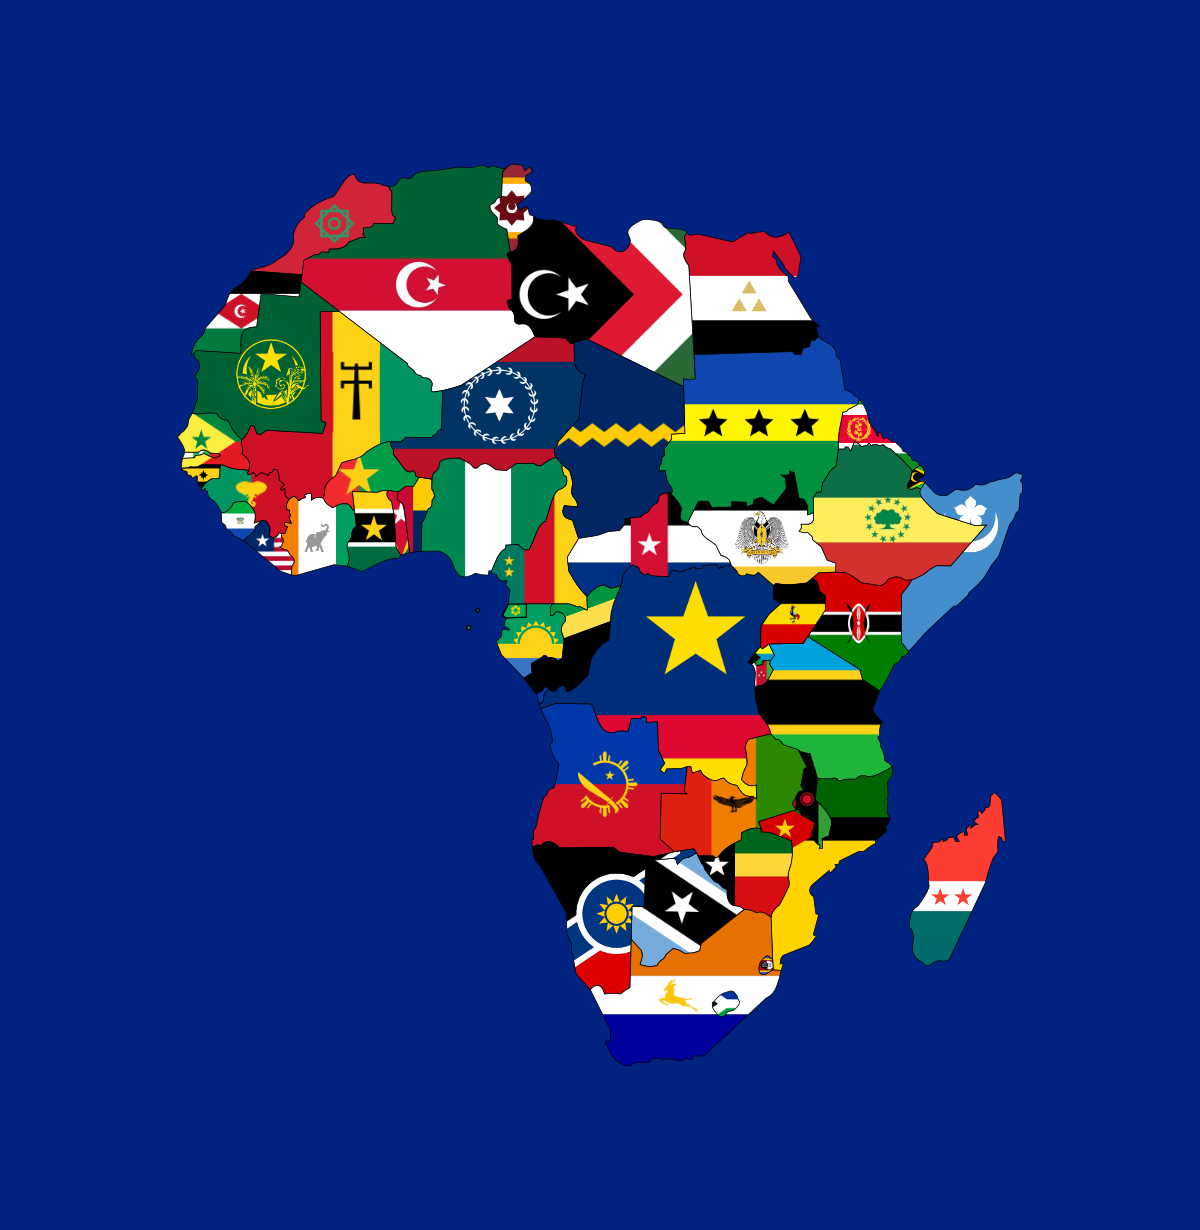

In [35]:
#Overlay Image

map_image_overlay = folium.Map(location=[2, 22], zoom_start=3, tiles="CartoDB Dark_Matter")

img_overlay = folium.raster_layers.ImageOverlay(name="Flags of Africa",
                                                image="data/images/flags_of_Africa.png",
                                                bounds=[[-46,-32.5],[47.5, 66]],
                                                opacity=0.3,
                                                zindex=1)

img_overlay.add_to(map_image_overlay)
folium.LayerControl().add_to(map_image_overlay)

map_image_overlay

In [36]:
#Charts in PopUP

yyc_weather = pd.read_csv('data/yyc_weather.csv')
yyc_weather.head()

,date,temp,dew_point,humidity,wind_speed,pressure
0,01/06/2022,66,25.3,29.8,5.4,26.4
1,02/06/2022,70,27.2,37.0,7.7,26.4
2,03/06/2022,72,27.0,30.0,12.5,26.2
3,04/06/2022,68,46.2,64.8,10.4,26.1
4,05/06/2022,59,49.1,90.4,9.1,26.1


In [37]:
import altair

yycw_means = pd.DataFrame({"yyc_x": ['temp',	'dew_point', 'humidity',	'wind_speed', 'pressure'],
                        "yyc_y": [yyc_weather.temp.mean(),
                                  yyc_weather.dew_point.mean(),
                                  yyc_weather.humidity.mean(),
                                  yyc_weather.wind_speed.mean(),
                                  yyc_weather.pressure.mean()]})

chart = altair.Chart(yycw_means, width=400).mark_bar().encode(x="yyc_x", y="yyc_y").properties(title="Calgary Weather Averages")

chart

alt.Chart(...)

In [38]:
# Geocode out Seattle's Coordinates
yyc_coord = geocoder.osm("Calgary, AB, Canada")

#Embed Chart in marker corresponding to location
map_chart = folium.Map(location=yyc_coord.latlng)

vega = folium.features.VegaLite(chart, width="100%", height="100%")
popup = folium.Popup()
vega.add_to(popup)

marker = folium.features.Marker(yyc_coord.latlng)
popup.add_to(marker)

marker.add_to(map_chart)

map_chart

In [39]:
address_box = ipywidgets.Text(valur='', placeholder='type here', description='address')
def plot_locations(address):
  location=geocoder.osm(address)
  latlng = [location.lat, location.lng]
  plot_locations_map = folium.Map(location=myLocation, zoom_start=5)
  folium.Marker(latlng, popup=str(address), tooltip="Click").add_to(plot_locations_map)
  display(plot_locations_map)

ipywidgets.interact_manual(plot_locations, address=address_box)

interactive(children=(Text(value='', description='address', placeholder='type here'), Button(description='Run …

<function __main__.plot_locations(address)>

In [40]:
import geopy.distance

route_start_widget = ipywidgets.Text(valur='', placeholder='type here', description='start:')
route_stop_widget = ipywidgets.Text(valur='', placeholder='type here', description='stop:')

def get_distance(start_address, stop_address):
  start_location = geocoder.osm(start_address)
  stop_location = geocoder.osm(stop_address)

  start_latlng = [start_location.lat, start_location.lng]
  stop_latlng = [stop_location.lat, stop_location.lng]

  distance = geopy.distance.distance(start_latlng, stop_latlng).miles
  print(f"Distance: {distance:.2f} miles")

  distance_path = [(start_latlng), (stop_latlng)]
  map_distance  = folium.Map(location=myLocation, zoom_start=5)
  plugins.AntPath(distance_path).add_to(map_distance)
  display(map_distance)

ipywidgets.interact_manual(get_distance, start_address=route_start_widget, stop_address=route_stop_widget)

interactive(children=(Text(value='', description='start:', placeholder='type here'), Text(value='', descriptio…

<function __main__.get_distance(start_address, stop_address)>

In [41]:
#FeatureGroupSubGroup

map_with_subgroups = folium.Map(location=myLocation, zoom_start=10, tiles="CartoDB Dark_Matter")

# all subgroups
all_subgroups = folium.FeatureGroup(name='all regions')
map_with_subgroups.add_child(all_subgroups)

# subgroup 1
region1 = plugins.FeatureGroupSubGroup(all_subgroups, 'Region NE')
map_with_subgroups.add_child(region1)

# subgroup 2
region2 = plugins.FeatureGroupSubGroup(all_subgroups, 'Region NW')
map_with_subgroups.add_child(region2)

# subgroup 3
region3 = plugins.FeatureGroupSubGroup(all_subgroups, 'Region SW')
map_with_subgroups.add_child(region3)

# subgroup 4
region4 = plugins.FeatureGroupSubGroup(all_subgroups, 'Region SE')
map_with_subgroups.add_child(region4)

# pull in geojson layers and add to map
folium.GeoJson(json.load(open('data/regions/ne-calgary.geojson')),name="Sales Region NE").add_to(region1)
folium.GeoJson(json.load(open('data/regions/nw-calgary.geojson')), name="Sales Region NW").add_to(region2)
folium.GeoJson(json.load(open('data/regions/sw-calgary.geojson')), name="Sales Region SW").add_to(region3)
folium.GeoJson(json.load(open('data/regions/se-calgary.geojson')), name="Sales Region SE").add_to(region4)

# add layer control to map (allows layers to be turned on or off)
folium.LayerControl(collapsed=False).add_to(map_with_subgroups)

# display map
map_with_subgroups

## Geocoding with GeoPy

First, we’re going to geocode data — aka get coordinates from addresses or place names — with the Python package GeoPy. GeoPy makes it easier to use a range of third-party geocoding API services, such as Google, Bing, ArcGIS, and OpenStreetMap.

Though most of these services require an API key, Nominatim, which uses OpenStreetMap data, does not, which is why we’re going to use it here.

#### Install GeoPy

In [42]:
#!pip install geopy

#### Import Nominatim
From GeoPy’s list of possible geocoding services, we’re going to import Nominatim:

In [43]:
from geopy.geocoders import Nominatim

#### Nominatim & OpenStreetMap¶
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Openstreetmap_logo.svg/256px-Openstreetmap_logo.svg.png)

Nominatim (which means “name” in Latin) uses OpenStreetMap data to match addresses with geopgraphic coordinates. Though we don’t need an API key to use Nominatim, we do need to create a unique application name.

Here we’re initializing Nominatim as a variable called geolocator. Change the application name below to your own application name:

In [44]:
geolocator = Nominatim(user_agent="Calgary Mapping App", timeout=2)

In [45]:
# To geocode an address or location, we simply use the .geocode() function:
location = geolocator.geocode("Blackfoot Trail, Calgary")
location

Location(Blackfoot Trail SE, Highfield, Calgary, Alberta, T2G 2A4, Canada, (51.0113324, -114.0485318, 0.0))

#### Google Geocoding API
The Google Geocoding API is superior to Nominatim, but it requires an API key and more set up. To enable the Google Geocoding API and get an API key, see Get <a href= "https://developers.google.com/maps/gmp-get-started">Started with Google Maps Platform </a> and <a href="https://developers.google.com/maps/documentation/geocoding/start">Get Started with Geocoding API</a>.

In [46]:
#from geopy.geocoders import GoogleV3
#google_geolocator = GoogleV3(api_key="YOUR-API-KEY HERE")
#google_geolocator.geocode("Cayuga Street")

In [47]:
# Get Address
print(location.address)
# Get Latitude and Longitude
print(location.latitude, location.longitude)
# Get "Importance" Score
print(f"Importance: {location.raw['importance']}")
# Get Class and Type
print(f"Class: {location.raw['class']} \nType: {location.raw['type']}")

Blackfoot Trail SE, Highfield, Calgary, Alberta, T2G 2A4, Canada
51.0113324 -114.0485318
Importance: 0.41000000000000003
Class: highway 
Type: secondary


### Get Multiple Possible Matches

In [48]:
possible_locations = geolocator.geocode("Blackfoot Trail", exactly_one=False)

for location in possible_locations:
    print(location.address)
    print(location.latitude, location.longitude)
    print(f"Importance: {location.raw['importance']}")

Blackfoot Trail, Carmel, Hamilton County, Indiana, 46033, United States
39.9848419 -86.070808
Importance: 0.30000999999999994
Blackfoot Trail, Mesquite, Dallas County, Texas, 75149, United States
32.75322 -96.569187
Importance: 0.30000999999999994
Blackfoot Trail, San Bernardino County, CAL Fire Southern Region, California, United States
34.1407743 -114.3776136
Importance: 0.30000999999999994
Blackfoot Trail, Heath, Licking County, Ohio, 43056, United States
40.03465 -82.390507
Importance: 0.30000999999999994
Blackfoot Trail, The Wilderness, Jacksonville, Duval County, Florida, 32223, United States
30.1499728 -81.623389
Importance: 0.3
Blackfoot Trail, Town of Liberty, Sullivan County, New York, 12734, United States
41.765067 -74.767767
Importance: 0.3
Blackfoot Trail, Five Points, Jackson Township, Mercer County, Pennsylvania, 16137, United States
41.299396 -80.181395
Importance: 0.3
Blackfoot Trail, Pocono Pines, Tobyhanna Township, Monroe County, Pennsylvania, 18350, United States
4

## Geocode with Pandas

To geocode every location in a CSV file, we can use Pandas, make a Python function, and `.apply()` it to every row in the CSV file.

In [49]:
import pandas as pd
pd.set_option("display.max_rows", 400)
pd.set_option("display.max_colwidth", 400)

Here we make a function with `geolocator.geocode()` and ask it to return the address, lat/lon, and importance score:

In [50]:
def find_location(row):
    place = row['place']
    location = geolocator.geocode(place)
    if location != None:
        return location.address, location.latitude, location.longitude, location.raw['importance']
    else:
        return "Not Found", "Not Found", "Not Found", "Not Found"

To start exploring, let's read in a CSV file with a list of places in and around Calgary.

In [51]:
yyc_df = pd.read_csv("data/yyc-places.csv")
yyc_df

,place
0,Eau Claire Market
1,Calgary Tower
2,Calgary petroleum Club
3,Glenbow Museum
4,Prince's Island Park
5,The Bow
6,Studio Bell
7,Fort Calgary
8,Western Canada High School
9,Olympic Plaza


Now let's `.apply()` our function to this Pandas dataframe and see what results Nominatim's geocoding service spits out.

In [52]:
yyc_df[['address', 'lat', 'lon', 'importance']] = yyc_df.apply(find_location, axis="columns", result_type="expand")
yyc_df

,place,address,lat,lon,importance
0,Eau Claire Market,"Eau Claire Market, Eau Claire, Calgary, Alberta, T2P 4R5, Canada",51.052585,-114.068411,0.500000
1,Calgary Tower,"Calgary Tower, 101, 9 Avenue SE, Victoria Park, Downtown Commercial Core, Calgary, Alberta, T2P 1J9, Canada",51.044294,-114.063132,0.567784
2,Calgary petroleum Club,"Calgary Petroleum Club, 5 Avenue SW, Downtown Commercial Core, Calgary, Alberta, T2P 0L6, Canada",51.048346,-114.068888,0.310100
3,Glenbow Museum,"Glenbow Museum, 130, 9 Avenue SE, Victoria Park, Downtown Commercial Core, Calgary, Alberta, T2G 0P3, Canada",51.045129,-114.061257,0.565455
4,Prince's Island Park,"Prince's Island Park, Eau Claire, Calgary, Alberta, T2P 0R1, Canada",51.055185,-114.070649,0.726239
5,The Bow,"The Bow, 500, 6 Avenue SE, Chinatown, Calgary, Alberta, T2G 1A6, Canada",51.047858,-114.061941,0.536487
6,Studio Bell,"Studio Bell, 850, 4 Street SE, Victoria Park, Downtown East Village, Calgary, Alberta, T2G 1R1, Canada",51.044600,-114.053058,0.514317
7,Fort Calgary,"Fort Calgary, RiverWalk Cycle Lanes, Downtown East Village, Calgary, Alberta, T2G 5E1, Canada",51.045364,-114.045589,0.569252
8,Western Canada High School,"Western Canada High School, 641, 17 Avenue SW, 17th Ave Retail & Entertainment District, Cliff Bungalow, Calgary, Alberta, T2S 0B6, Canada",51.036427,-114.076950,0.410100
9,Olympic Plaza,"Olympic Plaza, Victoria Park, Chinatown, Calgary, Alberta, Canada",51.045929,-114.059093,0.512795


## Making Interactive Maps based on teh data that we have

To map our geocoded coordinates, we're going to use the Python library [Folium](https://python-visualization.github.io/folium/). Folium is built on top of the popular JavaScript library [Leaflet](https://leafletjs.com/).

To install and import Folium, run the cells below:

In [53]:
import folium

### Base Map

First, we need to establish a base map. This is where we'll map our geocoded Ithaca locations. To do so, we're going to call `folium.Map()`and enter the general latitude/longitude coordinates of the Ithaca area at a particular zoom.

(To find latitude/longitude coordintes for a particular location, you can use Google Maps, [as described here](https://support.google.com/maps/answer/18539?co=GENIE.Platform%3DDesktop&hl=en).)

In [54]:
yyc_map = folium.Map(location=[51.0447, -114.0719], zoom_start=14)
yyc_map

### Add a Marker
Adding a marker to a map is easy with Folium! We'll simply call `folium.Marker()` at a particular lat/lon, enter some text to display when the marker is clicked on, and then add it to our base map.

In [55]:
folium.Marker(location=[51.0447, -114.0719], popup="Welcome to Calgary!").add_to(yyc_map)
yyc_map

### Add Markers From Pandas Data
To add markers for every location in our Pandas dataframe, we can make a Python function and `.apply()` it to every row in the dataframe.

In [56]:
def create_map_markers(row, map_name):
    folium.Marker(location=[row['lat'], row['lon']], popup=row['place']).add_to(map_name)

Before we apply this function to our dataframe, we're going to drop any locations that were "Not Found" (which would cause `folium.Marker()` to return an error).

In [57]:
found_yyc_locations = yyc_df[yyc_df['address'] != "Not Found"]

In [58]:
found_yyc_locations.apply(create_map_markers, map_name=yyc_map, axis='columns')
yyc_map

In [59]:
# Save map
yyc_map.save("data/yyc-map.html")

## The End